Title : Data Analytics III (Naive Bayes Theorm)

Implement Simple Naïve Bayes classification algorithm 
using Python/R on iris.csv dataset. Compute Confusion 
matrix to find TP, FP, TN, FN, Accuracy, Error rate, 
Precision, Recall on the given dataset.

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Count the NULL values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
# Shape = no of rows, no of columns
data.shape

(150, 6)

In [5]:
# Summary
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Label encoding
label_encoder=LabelEncoder()
data['Species']=label_encoder.fit_transform(data['Species'])

In [9]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


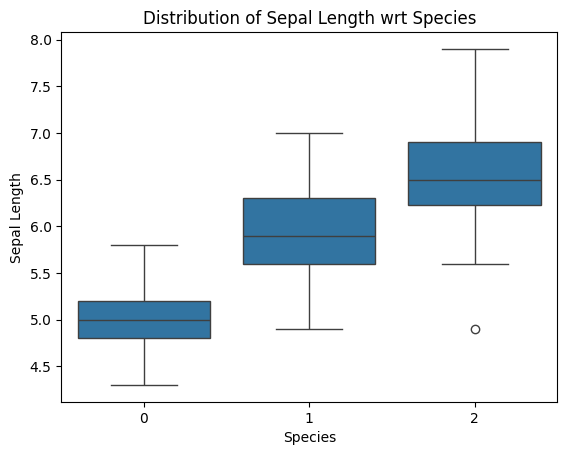

In [17]:
sns.boxplot(x="Species",y="SepalLengthCm",data=data)
plt.title('Distribution of Sepal Length wrt Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

In [18]:
# X is your input features (all columns except the last one).
# Y is your target variable (the last column).

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [21]:
# Split the data into training and testing parts
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
nb_classifier = GaussianNB()

In [25]:
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [27]:
# Make Predictions
y_pred = nb_classifier.predict(x_test)

In [28]:
# Confusion matrix
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


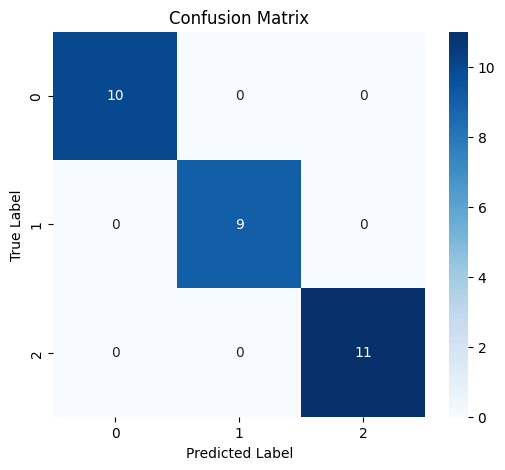

In [29]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix,cmap="Blues",annot=True)
plt.xlabel("Predicted Label")  
plt.ylabel("True Label")      
plt.title("Confusion Matrix")  
plt.show()

In [30]:
TP = np.diag(conf_matrix)  # True Positives
FP = conf_matrix.sum(axis=0) - TP  # False Positives
FN = conf_matrix.sum(axis=1) - TP  # False Negatives
TN = conf_matrix.sum() - (TP + FP + FN)  # True Negatives

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): [10  9 11]
False Positives (FP): [0 0 0]
False Negatives (FN): [0 0 0]
True Negatives (TN): [20 21 19]


In [32]:
# Accuracy, error rate, precision, recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average="macro")  # Macro-average for multi-class
recall = recall_score(y_test, y_pred, average="macro")  # Macro-average for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 1.0000
Error Rate: 0.0000
Precision: 1.0000
Recall: 1.0000
